<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/ANN_with_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Will be training an ANN on `mnist` datsset

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn ##neural network module
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import time


In [5]:
## Libraries have been imported.
## let's create a transform var

t = transforms.ToTensor()

In [6]:
## load the training and testing data
path= 'content/drive/Mydrive/ANN MNIST/'
train_data = datasets.MNIST(root=path, train=True, download=True, transform=t)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/train-images-idx3-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting content/drive/Mydrive/ANN MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to content/drive/Mydrive/ANN MNIST/MNIST/raw



In [7]:
test_data = datasets.MNIST(root= path, train=False, download=True, transform =t)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: content/drive/Mydrive/ANN MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: content/drive/Mydrive/ANN MNIST/
    Split: Test
    StandardTransform
Transform: ToTensor()

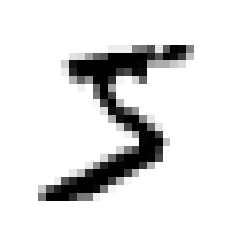

In [10]:
ex_image, ex_lab = train_data[0]
#plt.imshow(ex_image.reshape(28,28))
##plt.imshow(ex_image[0])
plt.imshow(torch.squeeze(ex_image), cmap='gist_yarg' ) ##default cmap 'viridis', 'gray can also be used'
plt.axis('off')
plt.show()

## all  these 3 options printing out the results

In [11]:
## loading in batches
torch.manual_seed(21)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [12]:
for img, lab in train_loader:
  print(img.size())
  print(lab)
  break

torch.Size([100, 1, 28, 28])
tensor([1, 9, 7, 8, 6, 9, 1, 9, 9, 9, 2, 3, 4, 7, 3, 3, 5, 7, 5, 4, 8, 6, 2, 6,
        5, 7, 3, 7, 0, 0, 0, 3, 3, 4, 3, 6, 1, 9, 7, 5, 4, 6, 9, 0, 0, 7, 2, 3,
        6, 5, 9, 4, 5, 9, 0, 7, 8, 6, 3, 5, 8, 2, 9, 6, 4, 3, 1, 3, 3, 9, 0, 8,
        3, 5, 3, 9, 4, 1, 5, 6, 9, 2, 2, 5, 7, 7, 2, 8, 4, 1, 1, 8, 6, 5, 2, 9,
        2, 6, 6, 8])


1       9       7       8       6       9       1       9


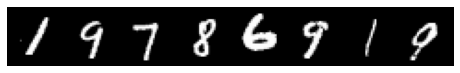

In [13]:
from torchvision.utils import make_grid

print(*lab[:8].numpy(), sep='       ')
im_set = make_grid(img[:8])
plt.figure(figsize=(8,10))
plt.imshow(np.transpose(im_set.numpy(),(1,2,0)))
plt.axis('off')
plt.show()

In [14]:
q = torch.tensor([1,2,3])
q.numpy()

array([1, 2, 3])

In [15]:
## Let's set the ann

class myANN(nn.Module):
  def __init__(self, inp_size, out_size, hidden=[120,84,42]):
    super().__init__()

    self.fully_con1 = nn.Linear(inp_size, hidden[0])
    self.fully_con2 = nn.Linear(hidden[0], hidden[1])
    self.fully_con3 = nn.Linear(hidden[1], hidden[2])
    self.fully_con4 = nn.Linear(hidden[2], out_size)

  
  def forward_pass(self, data):
    data = F.relu(self.fully_con1(data))
    data = F.sigmoid(self.fully_con2(data))
    data = F.relu(self.fully_con3(data))
    data = self.fully_con4(data)

    return F.log_softmax(data, dim=1) ##why dim=1, not dim=0? dim=0 will give number in batches. dim=1 gives num of samples in a batch


In [16]:
model = myANN(784, 10)
model

myANN(
  (fully_con1): Linear(in_features=784, out_features=120, bias=True)
  (fully_con2): Linear(in_features=120, out_features=84, bias=True)
  (fully_con3): Linear(in_features=84, out_features=42, bias=True)
  (fully_con4): Linear(in_features=42, out_features=10, bias=True)
)

In [17]:
tot=1
for param in model.parameters():
  print(param.numel())
  tot *= param.numel()

print(f'Total number of paramters: {tot}')

94080
120
10080
84
3528
42
420
10
Total number of paramters: 5949021386597990400000


In [20]:
## Let's set our criterions
lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

Training and evaluating our model

In [ ]:
start = time.time()

num_epoch = 16

trainLoss, trainCorr, testLoss, testCorr = list(), list(), list(), list()

for i in range(num_epoch):
  trn_corr = 0
  tst_corr = 0

  for b_no, (Xtrain, Ytrain) in enumerate(train_loader):
    
    b_no += 1
    Xtrain_flat = Xtrain.view(100,-1) ##100 -->batch size for train
    y_pred = model(Xtrain_flat) ##100 predictions returned

    loss = criterion(y_pred, Ytrain)

    ##  y_pred will be a 10  valued variable with probabilities for different classes

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted==Ytrain).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backpropagation()
    optimizer.step()

    if b%200 ==0:
      accuracy = trn_corr.item()/b_no
      print('EPOCH {} Batch {} LOSS {} Accuracy: {}'.format(i, b_no, loss.item(), accuracy))

    
  trainLoss.append(loss.item())
  trainCorr.append(trn_corr.item())

  with torch.no_grad():
    ##no_grad ensures weights and biases are not updated
    for b_no, (Xtest, Ytest) in enumerate(test_loader):
      b_no+=1
      y_val = model(Xtest.view(500,-1)) ##batch size in test is 500
      predicted = torch.max(y_val.data, 1)[1]

      tst_corr += (predicted==Ytest).sum()
  
  loss = criterion(y_val, Ytest)
  testLoss.append(loss.item)
  testCorr.append(tst_corr.item())
  


end = time.time()

print("Total time in training:", (end-start)/60, 'minutes')